In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data in all datasets
file_path = '/Users/liqiao/Desktop/UTokyo/Food/2024_recipes/Asia_food/Data validation/Comparison_of_GHG.xlsx'
xls = pd.ExcelFile(file_path)

/var/folders/d7/p46qc1857_x7221pjnvz6rz80000gn/T/ipykernel_1907/1445396876.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({
/var/folders/d7/p46qc1857_x7221pjnvz6rz80000gn/T/ipykernel_1907/1445396876.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({
/var/folders/d7/p46qc1857_x7221pjnvz6rz80000gn/T/ipykernel_1907/1445396876.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({
/var/folders/d7/p46qc1857_x7221pjnvz6rz80000gn/T/ipykernel_1907/1445396876.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({
/var/folders/d7/

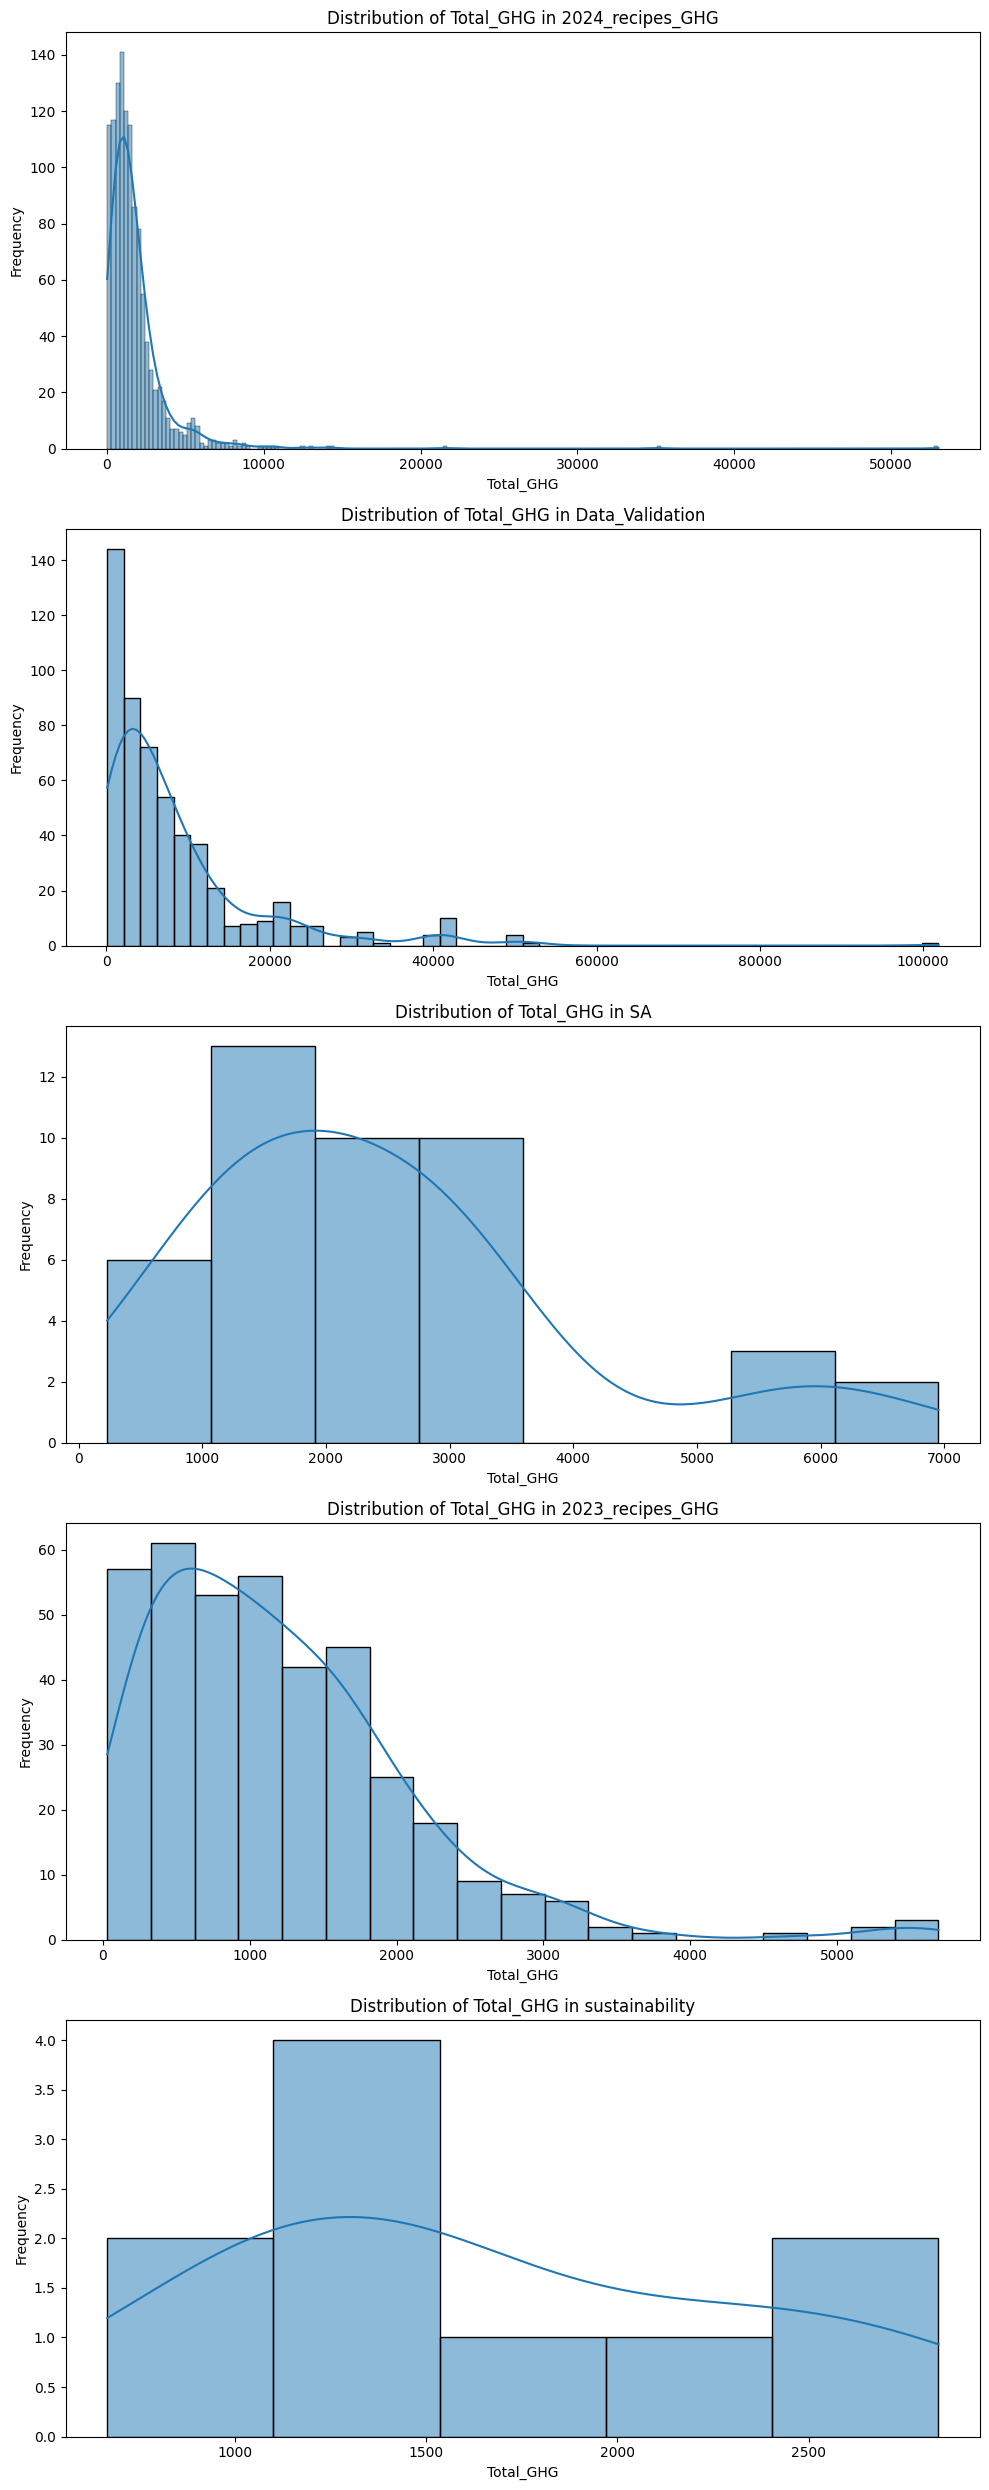

         Sheet Name         Mean       Median           Std         Min  \
0  2024_recipes_GHG  1799.818275  1283.058875   2509.623035   24.155068   
1   Data_Validation  8440.598148  5148.000000  10310.495781   93.000000   
2                SA  2455.676748  2149.061868   1575.706864  231.883656   
3  2023_recipes_GHG  1205.504878  1031.547715    923.933935   30.300201   
4    sustainability  1657.797693  1399.462366    701.122300  666.666667   

             Max  
0   53009.799827  
1  101860.000000  
2    6952.551040  
3    5689.857342  
4    2839.285714  


In [2]:
# denote each dataset with the name of excel sheets
sheet_names = xls.sheet_names

stats_df = pd.DataFrame(columns=['Sheet Name', 'Mean', 'Median', 'Std', 'Min', 'Max'])

# visulization
fig, axes = plt.subplots(len(sheet_names), 1, figsize=(10, len(sheet_names) * 5))

# data comparison
for i, sheet in enumerate(sheet_names):
    df = pd.read_excel(xls, sheet_name=sheet)
    total_ghg = df['Total_GHG'].dropna()
    
    # distribution analysis
    mean_val = total_ghg.mean()
    median_val = total_ghg.median()
    std_val = total_ghg.std()
    min_val = total_ghg.min()
    max_val = total_ghg.max()
    
    # output results
    stats_df = stats_df.append({
        'Sheet Name': sheet,
        'Mean': mean_val,
        'Median': median_val,
        'Std': std_val,
        'Min': min_val,
        'Max': max_val
    }, ignore_index=True)
    
    # visulization
    sns.histplot(total_ghg, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Total_GHG in {sheet}')
    axes[i].set_xlabel('Total_GHG')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()
